<a href="https://colab.research.google.com/github/FakeaVangchhia/Regression_Models/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [50]:
df = pd.read_csv('sample_data/decision_tree_dataset.csv')
df

,ID,Experience,Salary,Education
0,1,19,54276.0,PhD
1,2,14,64020.0,PhD
2,3,11,52501.0,Bachelor
3,4,1,50565.0,Bachelor
4,5,28,43163.0,Bachelor
...,...,...,...,...
595,596,14,87077.0,Bachelor
596,597,16,25667.0,Bachelor
597,598,2,NaN,Bachelor
598,599,14,45508.0,NaN


In [51]:
# Convert the Education into numeric type format
label_encoder = LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])

In [52]:
# Fill the missing value with mean or mode.
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Education'].fillna(df['Education'].mode(), inplace=True)

In [53]:
df

,ID,Experience,Salary,Education
0,1,19,54276.000000,2
1,2,14,64020.000000,2
2,3,11,52501.000000,0
3,4,1,50565.000000,0
4,5,28,43163.000000,0
...,...,...,...,...
595,596,14,87077.000000,0
596,597,16,25667.000000,0
597,598,2,84548.823308,0
598,599,14,45508.000000,3


In [54]:
X = df[['Experience', 'Education']]
y = df['Salary']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [58]:
y_pred = tree_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared error: ", mse)

r2 = r2_score(y_test, y_pred)
print(r2)

Mean Squared error:  1249352419.1626234
-0.10772464550109184


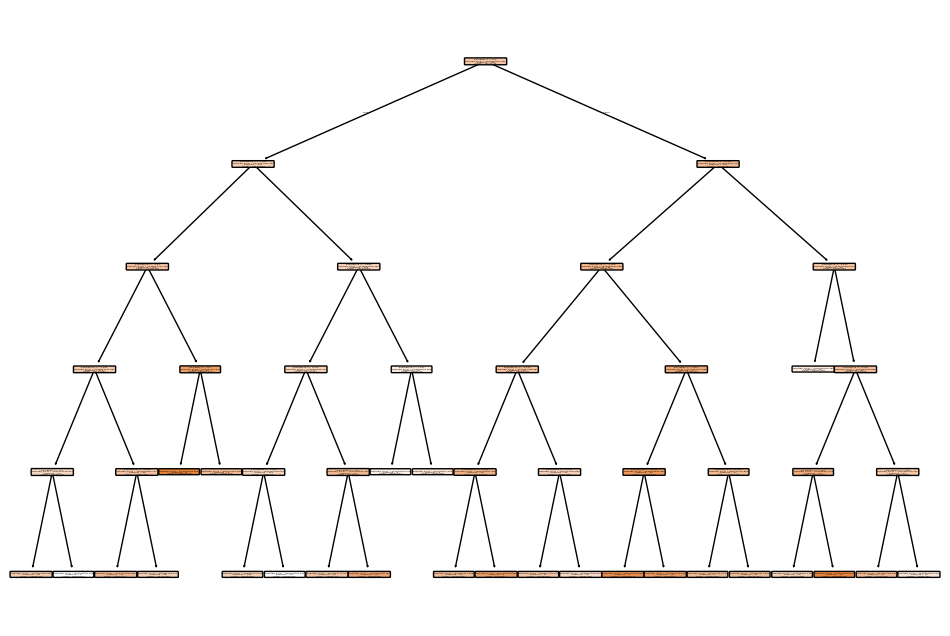

In [59]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, filled=True, feature_names=['Experience', 'Education'], rounded=True)
plt.show()
